In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_table('diffexpr_data.tsv.gz')

In [3]:
df

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000
...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000


In [5]:
conditions = [
    (df['pval_corr'] < 0.05) & (df['logFC'] < 0),
    (df['pval_corr'] < 0.05) & (df['logFC'] >= 0),
    (df['pval_corr'] >= 0.05) & (df['logFC'] < 0),
    (df['pval_corr'] >= 0.05) & (df['logFC'] >= 0)

]

values = ['Non-significantly upregulated', 'Non-significantly downregulated',
            'Significantly downregulated', 'Significantly upregulated']

df['labels'] = np.select(conditions, values)

In [6]:
df

,Sample,logFC,pval,pval_corr,log_pval,labels
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000,Significantly upregulated
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000,Significantly upregulated
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000,Significantly upregulated
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000,Significantly upregulated
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000,Significantly upregulated
...,...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227,Non-significantly upregulated
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000,Significantly downregulated
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498,Non-significantly upregulated
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000,Significantly downregulated


In [7]:
largest = df[df['labels'].str.startswith('S')].nlargest(2, 'logFC')
smallest  = df[df['labels'].str.startswith('S')].nsmallest(2, 'logFC')

In [8]:
largest; smallest

,Sample,logFC,pval,pval_corr,log_pval,labels
20528,SEMG1,-9.313028,0.000388,1.0,-0.0,Significantly downregulated
20526,SEMG2,-8.651953,0.000399,1.0,-0.0,Significantly downregulated


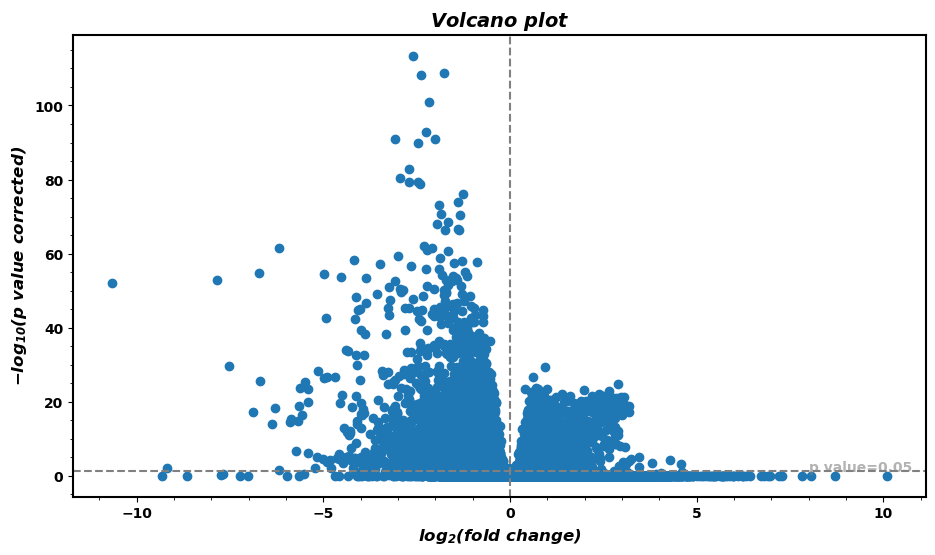

In [38]:

fig, ax = plt.subplots(figsize=(11,6))
plt.setp(ax.spines.values(), linewidth=1.5)
plt.scatter(df['logFC'], df['log_pval'] )


plt.axvline(x = 0, color='gray', linestyle='--')
plt.axhline(-np.log10(0.05), color='gray', linestyle='--')
plt.text(8, -np.log10(0.05), 'p value=0.05', weight='bold', c='gray', alpha = 0.6)


plt.xlabel(r'$\mathbf{\bf{log_2(fold \ change)}}$', size=12)
plt.ylabel(r"$\mathbf{\bf{-log_{10}(p \ value \ corrected)}}$", size=12)
plt.title(r'$\mathbf{\bf{Volcano \ plot}}$', size=14)

plt.minorticks_on()
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.xlim(df.logFC.min() - 0.8, df.logFC.max() + 0.8)
plt.ylim(df.log_pval.min() - 6, df.log_pval.max() + 6)

plt.autoscale()

plt.savefig('volcplot.png', dpi = 300, bbox_inches = 'tight', edgecolor = 'b')